In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
import seaborn as sns

#Data Loading

In [2]:
df=pd.read_csv('upi_transactions_2024.csv')

In [3]:
df.shape

(250000, 17)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 17 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   transaction id      250000 non-null  object
 1   timestamp           250000 non-null  object
 2   transaction type    250000 non-null  object
 3   merchant_category   250000 non-null  object
 4   amount (INR)        250000 non-null  int64 
 5   transaction_status  250000 non-null  object
 6   sender_age_group    250000 non-null  object
 7   receiver_age_group  250000 non-null  object
 8   sender_state        250000 non-null  object
 9   sender_bank         250000 non-null  object
 10  receiver_bank       250000 non-null  object
 11  device_type         250000 non-null  object
 12  network_type        250000 non-null  object
 13  fraud_flag          250000 non-null  int64 
 14  hour_of_day         250000 non-null  int64 
 15  day_of_week         250000 non-null  object
 16  is

In [5]:
df.head()

,transaction id,timestamp,transaction type,merchant_category,amount (INR),transaction_status,sender_age_group,receiver_age_group,sender_state,sender_bank,receiver_bank,device_type,network_type,fraud_flag,hour_of_day,day_of_week,is_weekend
0,TXN0000000001,2024-11-05 15:30:02,P2P,Entertainment,534,SUCCESS,26-35,26-35,Rajasthan,IndusInd,SBI,Android,4G,0,15,Tuesday,0
1,TXN0000000002,2024-04-10 12:13:08,P2M,Grocery,1951,SUCCESS,26-35,26-35,Andhra Pradesh,SBI,Axis,Android,4G,0,12,Wednesday,0
2,TXN0000000003,2024-04-12 17:59:54,P2P,Grocery,388,SUCCESS,26-35,26-35,Delhi,ICICI,Kotak,iOS,4G,0,17,Friday,0
3,TXN0000000004,2024-10-22 22:59:54,P2P,Fuel,1495,SUCCESS,26-35,26-35,Rajasthan,SBI,Axis,Android,4G,0,22,Tuesday,0
4,TXN0000000005,2024-08-12 12:21:34,P2P,Shopping,4333,SUCCESS,18-25,26-35,Tamil Nadu,HDFC,HDFC,iOS,4G,0,12,Monday,0


In [6]:
df.isnull().sum()

,0
transaction id,0
timestamp,0
transaction type,0
merchant_category,0
amount (INR),0
transaction_status,0
sender_age_group,0
receiver_age_group,0
sender_state,0
sender_bank,0


In [7]:
# Select only categorical columns
categorical_cols = [
    "transaction type", "merchant_category", "transaction_status",
    "sender_age_group", "receiver_age_group", "sender_state",
    "sender_bank", "receiver_bank", "device_type", "network_type", "day_of_week"
]

In [14]:
# Step 1: Convert categorical variables to numeric using Label Encoding or One-Hot Encoding
df_encoded = df.copy()

# Label encoding for simplicity (use One-Hot if appropriate)
from sklearn.preprocessing import LabelEncoder

label_encoders = {}
for col in df_encoded.select_dtypes(include=['object', 'category']).columns:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col].astype(str))
    label_encoders[col] = le

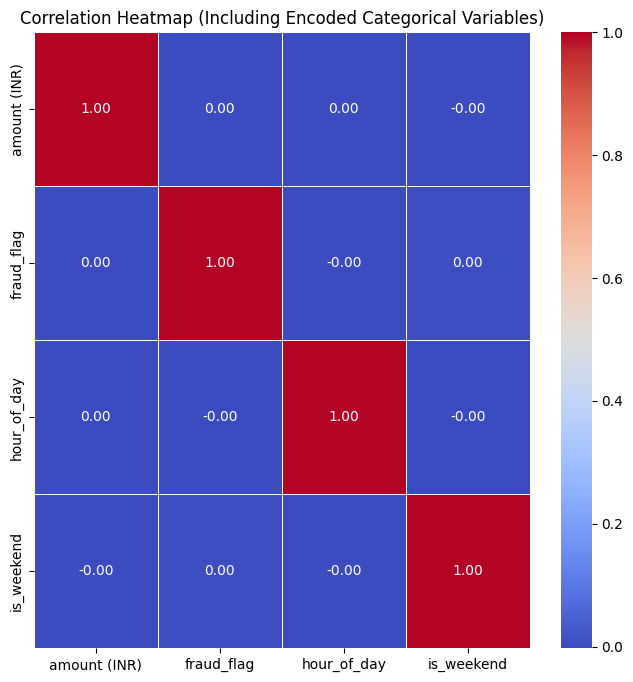

In [21]:
# Step 2: Compute correlation matrix
corr_matrix=df.select_dtypes(include='number').corr()

# Step 3: Plot heatmap
plt.figure(figsize=(8,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap (Including Encoded Categorical Variables)')
plt.show()

In [22]:
from sklearn.preprocessing import LabelEncoder

df_encoded = df.copy()
for col in df_encoded.select_dtypes(include=['object', 'category']).columns:
    df_encoded[col] = LabelEncoder().fit_transform(df_encoded[col].astype(str))

corr_matrix_all_values = df_encoded.corr()

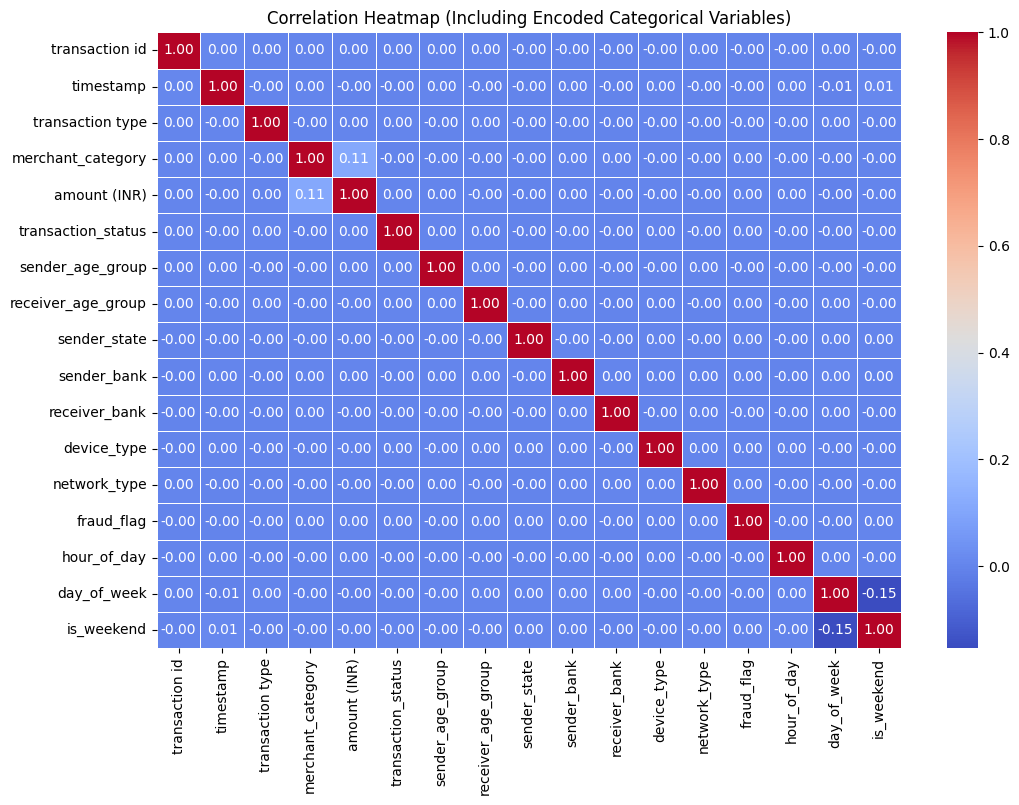

In [24]:
# Step 3: Plot heatmap
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix_all_values, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap (Including Encoded Categorical Variables)')
plt.show()

#Bar Chart 1: Transactions by Transaction Type

<ipython-input-10-2415232858>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='transaction type', order=df['transaction type'].value_counts().index, palette='Set2')


Text(0, 0.5, 'Count')

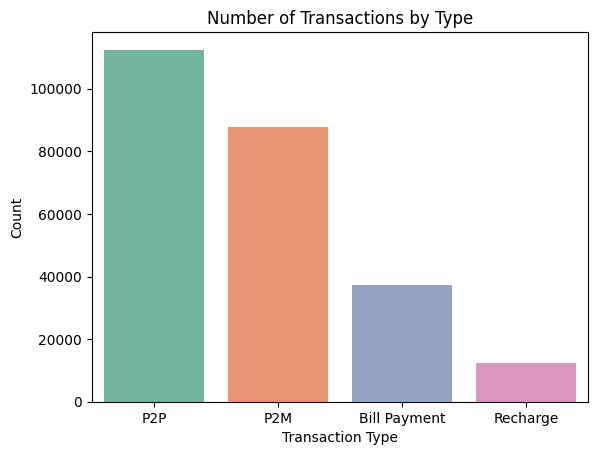

In [10]:
plt.subplot(1,1,1)
sns.countplot(data=df, x='transaction type', order=df['transaction type'].value_counts().index, palette='Set2')
plt.title("Number of Transactions by Type")
plt.xlabel("Transaction Type")
plt.ylabel("Count")

#So hereby we are able to get that

1. Majority Payments are P2P(Person to Person) [15000]
2. It is followed by P2M(Person to Merchant) [8500]
3. The Least transaction is for Recharge [<2000]

So we can say that UPI is most trusted only for Person to Person Payment (P2P) , so reliability of UPI for Recharge should be increased among the users considering necessary actions required

#Bar Chart 2: Fraud Count by Sender Bank (Top 10)

<ipython-input-11-2009719664>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=fraud_by_bank.values, y=fraud_by_bank.index, palette='Reds_r')


Text(0, 0.5, 'Sender Bank')

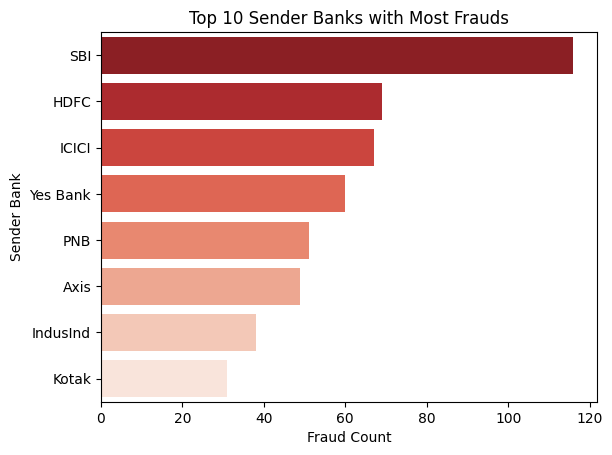

In [11]:
plt.subplot(1,1,1)
fraud_by_bank = df[df['fraud_flag'] == 1]['sender_bank'].value_counts().head(10)
sns.barplot(x=fraud_by_bank.values, y=fraud_by_bank.index, palette='Reds_r')
plt.title("Top 10 Sender Banks with Most Frauds")
plt.xlabel("Fraud Count")
plt.ylabel("Sender Bank")

#So hereby we are able to get that

1. Majority Fraud is having the **SBI Gateway of Payment[110]**
2. It is followed by **HDFC,ICICI[75]**
3. The Least Fraud is for **Kotak[25]**

So we can say that SBI's system is having security issues. This should be taken care of by SBI and it is followed by HDFC and ICICI. Kotak Bank is having the most secure system for UPI payments.

#Pie Chart 1: Transaction Status Distribution (Success vs Failure)

Text(0.5, 1.0, 'Transaction Status Distribution')

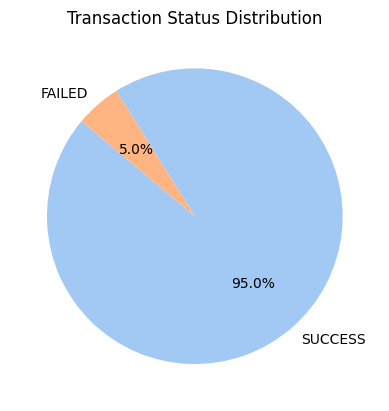

In [12]:
plt.subplot(1,1,1)
status_counts = df['transaction_status'].value_counts()
plt.pie(status_counts, labels=status_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title("Transaction Status Distribution")


#So hereby we are able to get that
1. 95% of the transactions are Successfull
2. 5% of the transactions failed.

So it could be concluded that UPI is well functionable in majority of the events with 95% accuracy which is overwhelming. But this needs to be increased to 98%

#Pie Chart 2: Device Type Usage Distribution

Text(0.5, 1.0, 'Device Type Used in Transactions')

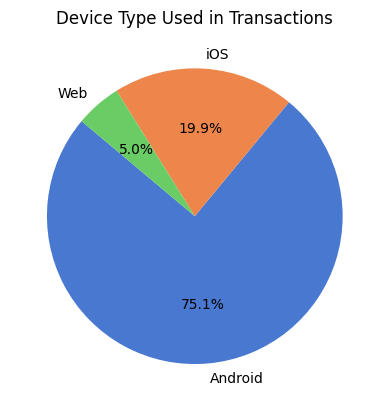

In [13]:
plt.subplot(1,1,1)
device_counts = df['device_type'].value_counts()
plt.pie(device_counts, labels=device_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('muted'))
plt.title("Device Type Used in Transactions")

#So hereby we are able to get that
1. 75% Android Users
2. 20% iOS Users
3. 5% use Net Banking

Compatibility of UPI is more with the Android System , so it has a larger acceptance along with it's larger userbase

#Fraud Prediction using Logistic Regression


In [25]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder

In [30]:
# Encode categorical variables
df_encoded = df.copy()
for col in df_encoded.select_dtypes(include='object'):
    if col not in ['transaction id', 'timestamp']:
        df_encoded[col] = LabelEncoder().fit_transform(df_encoded[col].astype(str))

# Define features and target
x = df_encoded.drop(columns=['transaction id', 'timestamp', 'fraud_flag'])
y = df_encoded['fraud_flag']

In [44]:
# Train model using Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

clf = LogisticRegression(max_iter=10000, random_state=0)
clf.fit(X_train,y_train)
acc = accuracy_score(y_test, clf.predict(X_test)) * 100
print(f"Logistic Regression model accuracy: {acc:.2f}%")

Logistic Regression model accuracy: 99.81%
